In [5]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd

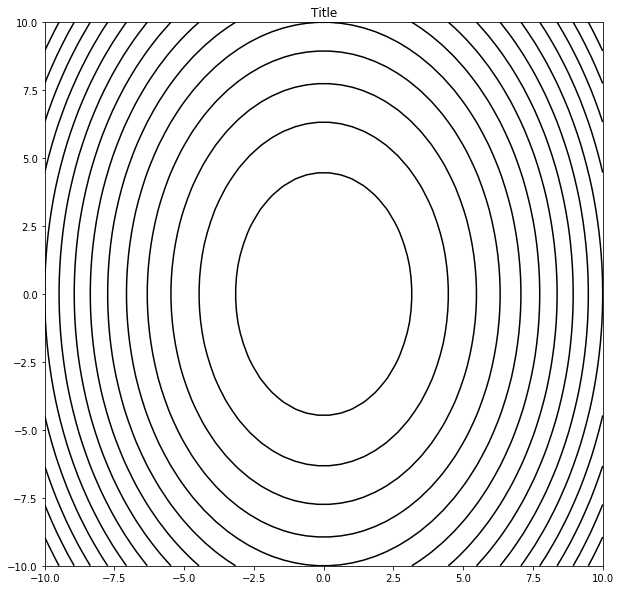

In [6]:
from plot import plot

plot(gamma=2);

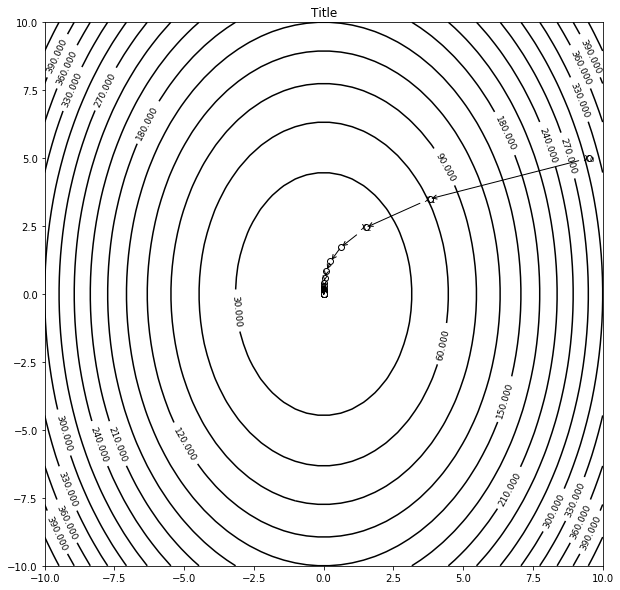

In [125]:
data = np.load('homework/data.data')
plot(gamma=2, points=data)

In [21]:
import pandas as pd

parameters = pd.read_csv('homework/parameters.csv', sep=';')
parameters

,x_0,x_1,gama
0,0.168251,0.257792,8.0
1,0.196249,0.396799,2.0
2,0.317480,0.073995,7.0
3,0.316429,0.684096,5.0
4,0.217563,0.402388,3.0
5,0.251042,0.982835,1.0
6,0.892922,0.402184,9.0
7,0.703223,0.620672,2.0
8,0.555738,0.154370,2.0
9,0.184434,0.381345,7.0


In [33]:
a = None
for index, row in parameters.iterrows():
    a = row
    break
x_0, x_1, gama = a
x_0, x_1, gama

(0.1682513, 0.25779225, 8.0)

In [174]:
data = pd.read_csv('../results.csv', sep=';')
data.head()

,method,line_search,id_parameter,alpha,beta,step,x_0,x_1
0,GradientDescent,ExactLineSearch,0,NaN,NaN,0,0.168251,0.257792
1,GradientDescent,ExactLineSearch,0,NaN,NaN,1,0.002086,0.225968
2,GradientDescent,ExactLineSearch,0,NaN,NaN,2,-0.014012,0.008022
3,GradientDescent,ExactLineSearch,0,NaN,NaN,3,-0.000174,0.007032
4,GradientDescent,ExactLineSearch,0,NaN,NaN,4,0.000926,0.001470


In [175]:
data[['method', 'line_search']].drop_duplicates()

,method,line_search
0,GradientDescent,ExactLineSearch
11,SteepestDescent,ExactLineSearch
17,GradientDescent,BacktrackingLineSearch
15392,SteepestDescent,BacktrackingLineSearch
28087,Newton,BacktrackingLineSearch


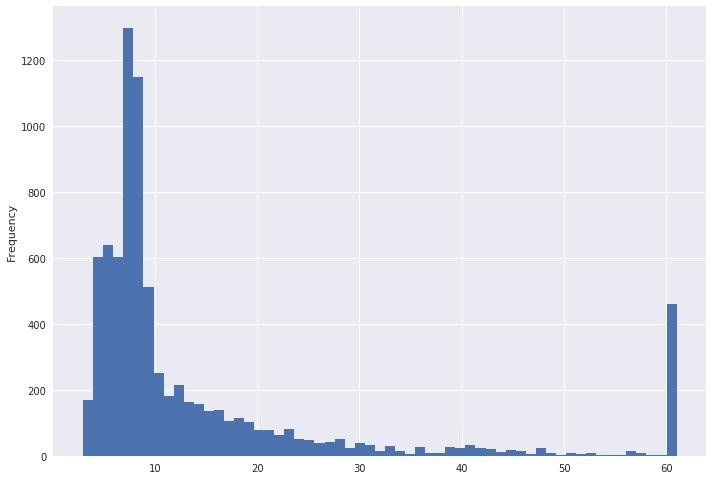

In [203]:
filter_method = lambda method, line_search: data[(data['method'] == method) & (data['line_search'] == line_search)]

filtered = filter_method('Newton', 'BacktrackingLineSearch')
filtered

group_by = filtered.groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
group_by.sort_values('step')['step'].plot.hist(59)

In [205]:
group_by2 = filtered[data['id_parameter']==0].groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
a = group_by2.unstack()['step']#[['alpha', 'beta', 'step']]
#del a['method']
a = a.reset_index(['method', 'line_search', 'id_parameter'])
del a['method']
del a['line_search']
del a['id_parameter']

a

#group_by2.reset_index('alpha')['alpha'].plot()

/home/paulo/git/otimizacao/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


beta,0.01,0.0545,0.099,0.14350000000000002,0.188,0.2325,0.27699999999999997,0.3215,0.366,0.4105,0.455,0.4995,0.544,0.5885,0.633,0.6775,0.722,0.7665,0.8109999999999999,0.8554999999999999
alpha,,,,,,,,,,,,,,,,,,,,
0.0100,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.0545,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.0990,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.1435,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.1880,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.2325,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
0.2770,61,37,21,15,11,9,8,7,6,6,5,5,4,4,3,3,4,4,4,5
0.3215,61,37,21,15,11,9,8,7,6,6,5,5,4,4,3,3,4,4,4,5
0.3660,61,37,21,15,11,9,8,7,6,6,5,5,4,4,3,3,4,4,4,4


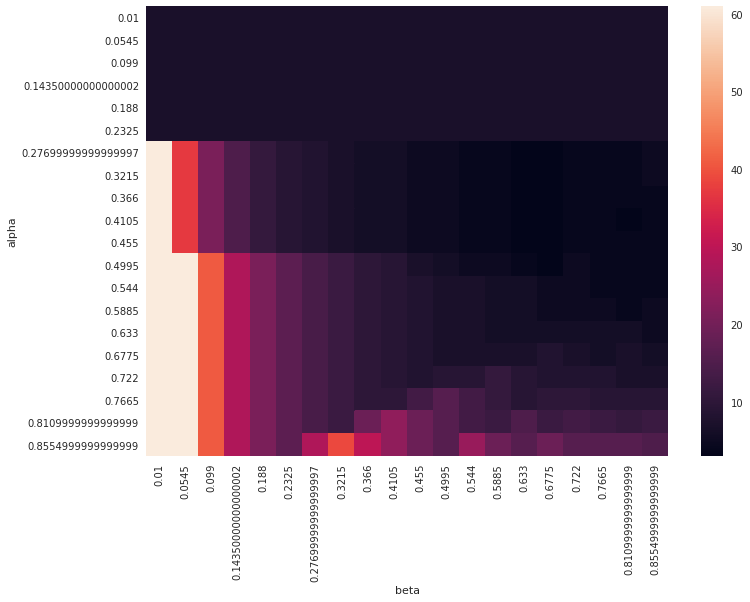

In [206]:
#group_by.sort_values('step')['step'].plot.hist(61)
#group_by[group_by['method']]
sns.heatmap(a)

In [159]:
%pip install seaborn


The following command must be run outside of the IPython shell:

    $ pip install seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
